In [1]:
import pandas as pd
df = pd.read_excel("WF305900_normalized_Intensities.xlsx")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.068622,0.083932,0.131006,0.110712,0.091700,0.242029,0.086491,0.120168,0.087758,0.090859,...,0.127396,0.071876,0.196801,0.145509,0.170728,0.065765,0.053665,0.078728,0.066666,0.142620
1,0.056056,0.044472,0.071253,0.038244,0.072514,0.062007,0.086187,0.037235,0.237438,0.056541,...,0.089301,0.144980,0.051161,0.115317,0.081901,0.062326,0.025021,0.158073,0.066427,0.032316
2,0.077852,0.068586,0.097842,0.047826,0.063317,0.055662,0.101452,0.066193,0.145681,0.000000,...,0.000448,0.068762,0.092149,0.076206,0.083214,0.053237,0.019427,0.162944,0.077739,0.052962
3,0.036581,0.079750,0.102480,0.023690,0.124432,0.124074,0.174516,0.118123,0.155561,0.085115,...,0.144612,0.201845,0.058929,0.204697,0.102756,0.074187,0.045000,0.141348,0.066891,0.026245
4,0.025598,0.111947,0.133619,0.036449,0.068158,0.209541,0.083468,0.257534,0.014220,0.046970,...,0.292240,0.069515,0.086225,0.216104,0.137389,0.088567,0.043240,0.028853,0.040062,0.042705


# This the procedure for Normalization through formula


In [3]:
import numpy as np
data=df.values
min1=np.min(data,0)
max1=np.max(data,0)
normed=(data-min1)/(max1-min1)
print(normed)

[[0.08061999 0.08825592 0.26226889 ... 0.18743021 0.13484101 0.32182876]
 [0.06585737 0.04676361 0.14264591 ... 0.37632677 0.13435799 0.07292283]
 [0.09146375 0.07211929 0.19587626 ... 0.38792293 0.1572379  0.11951053]
 ...
 [0.10507903 0.0901028  0.21796672 ... 0.42812762 0.16369148 0.1478174 ]
 [0.14934393 0.07498145 0.21597864 ... 0.24750706 0.160515   0.20689087]
 [0.07995348 0.049019   0.22436751 ... 0.33960414 0.1735237  0.06724371]]


# Distribution of Intensities and ellipse is the std_deviation how its spread and the orange dot representing mean

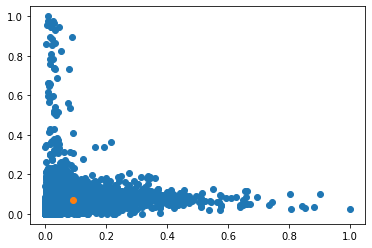

In [4]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
mean=np.mean(normed,0)
std_dev=np.std(normed,0)

ellipse=patches.Ellipse([mean[0],mean[1]],std_dev[0]**2,std_dev[1]**2,alpha=0.25)
fig,graph=plt.subplots()

graph.scatter(normed[:,0],normed[:,1])
graph.scatter(mean[0],mean[1])
graph.add_patch(ellipse)

# This is to compute the distance to the mean.In otherwords the Euclidean distance array

In [12]:
dists=[np.linalg.norm(norm-mean) for norm in normed]
#print(dists)

In [6]:
#a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
np.histogram(dists) 
hist,bins = np.histogram(dists) 
print(hist) 
 

[ 859 3656 3343 2237 1103  556  291  196  336   78]


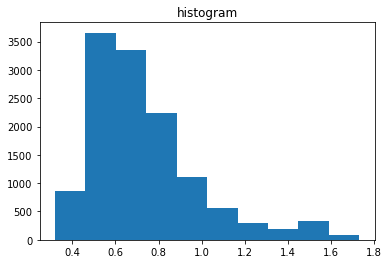

In [7]:
from matplotlib import pyplot as plt 
    
 
plt.hist(dists) 
plt.title("histogram") 
plt.show()

In [8]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(normed)
print(normed.shape)
print(projected.shape)

(12655, 64)
(12655, 2)


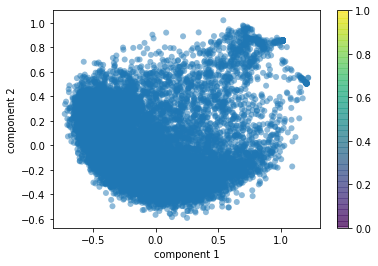

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],alpha=0.5,edgecolor='none',cmap=plt.cm.get_cmap('winter_r', 10))
#            c=normed, edgecolor='none', alpha=0.5,
#            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();